In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from mpl_toolkits.mplot3d import Axes3D

In [4]:
Data = pd.read_csv('/content/Clustering.csv')

Data.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         15000 non-null  int64 
 1   gender           13663 non-null  object
 2   age              12504 non-null  object
 3   NumberOffriends  15000 non-null  int64 
 4   basketball       15000 non-null  int64 
 5   football         15000 non-null  int64 
 6   soccer           15000 non-null  int64 
 7   softball         15000 non-null  int64 
 8   volleyball       15000 non-null  int64 
 9   swimming         15000 non-null  int64 
 10  cheerleading     15000 non-null  int64 
 11  baseball         15000 non-null  int64 
 12  tennis           15000 non-null  int64 
 13  sports           15000 non-null  int64 
 14  cute             15000 non-null  int64 
 15  sex              15000 non-null  int64 
 16  sexy             15000 non-null  int64 
 17  hot              15000 non-null

Exploratory Data Analysis (EDA)

In [6]:
# Checking for missing values
Data.isna().sum()

,0
gradyear,0
gender,1337
age,2496
NumberOffriends,0
basketball,0
football,0
soccer,0
softball,0
volleyball,0
swimming,0


HANDLING MISSING VALUES

In [7]:
# Convert age to numeric
Data['age'] = pd.to_numeric(Data['age'], errors='coerce')

# AGE: fill missing with median age per gradyear
Data['age'] = Data.groupby('gradyear')['age'].transform(lambda x: x.fillna(x.median()))

# GENDER: fill missing with mode gender per gradyear
Data['gender'] = Data.groupby('gradyear')['gender'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'F'))

# Encode gender as numeric: F=0, M=1
Data['gender'] = Data['gender'].map({'F': 0, 'M': 1})

# **Handling Missing Values (Age & Gender)**

In the dataset, age and gender had missing values. Instead of dropping those rows and losing valuable data, I applied a group-based imputation strategy that leverages graduation year (gradyear) to fill in the gaps more realistically:

Age:
I converted the age column to numeric and then filled missing values with the median age within each graduation year. This makes sense because students graduating in the same year should generally be around the same age.

Gender:
For gender, I filled missing values with the most common (mode) gender within each graduation year. For example, if most students in gradyear = 2007 were female, then missing gender values for that year were imputed as female. Afterward, I encoded gender as numeric values (F = 0, M = 1) for modeling purposes.

As a result, the dataset now has no missing values in either age or gender, while keeping the imputations context-aware and consistent with student cohorts.

In [8]:
Data.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,0,17.708,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,0,17.410,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,0,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,0,18.683,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,0,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


# **1. Summary statistics and distributions for demographics and interest frequencies**

Gradyear Summary:
gradyear
2006    3761
2007    3737
2008    3789
2009    3713
Name: count, dtype: int64


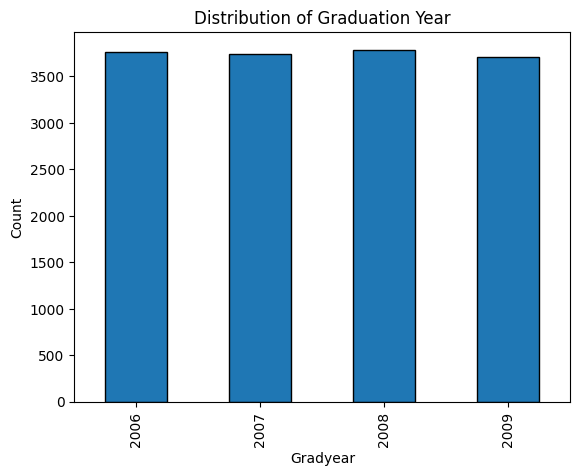

In [9]:
# Gradyear
print("Gradyear Summary:")
print(Data['gradyear'].value_counts().sort_index())

Data['gradyear'].value_counts().sort_index().plot(kind='bar', edgecolor='k')
plt.title("Distribution of Graduation Year")
plt.xlabel("Gradyear")
plt.ylabel("Count")
plt.show()

# **Graduation Year Distribution**

The bar chart shows the number of students in each gradyear. The distribution is fairly balanced across the years, with slightly higher counts in some cohorts. This confirms that the dataset covers multiple graduating classes, giving us a broad view of students over time.


Gender Summary:
gender
0    12394
1     2606
Name: count, dtype: int64


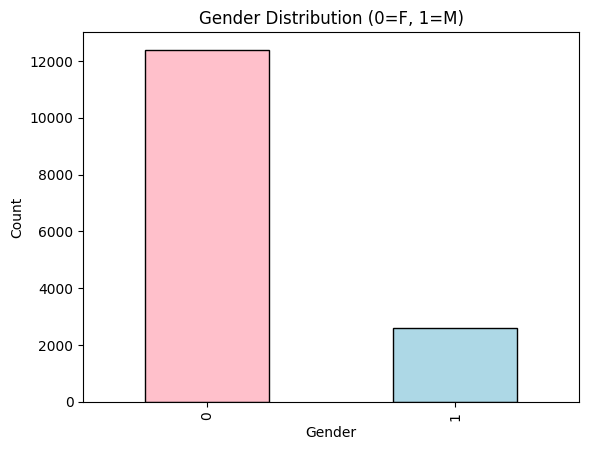

In [10]:
# 2. Gender
print("\nGender Summary:")
print(Data['gender'].value_counts())

Data['gender'].value_counts().plot(kind='bar', color=['pink','lightblue'], edgecolor='k')
plt.title("Gender Distribution (0=F, 1=M)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# **Gender Distribution**
After imputing missing values and encoding gender (0 = Female, 1 = Male), the gender distribution is visible. The dataset is skewed toward females, with more female students represented than male students. This imbalance is important to keep in mind during clustering, as some groups might be more heavily defined by female interests.


Age Summary:
count    15000.000000
mean        17.834266
std          6.989326
min          4.309000
25%         16.307000
50%         17.270000
75%         18.251000
max        106.927000
Name: age, dtype: float64


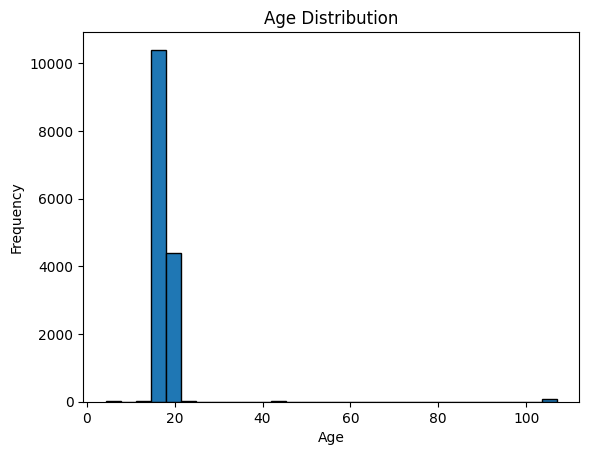

In [11]:
# Age
print("\nAge Summary:")
print(Data['age'].describe())

plt.hist(Data['age'], bins=30, edgecolor='k')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# **Age Distribution**

The histogram of ages shows that most students are between 16 and 19 years old, which aligns with the expected age range for high school. The distribution is unimodal and centered around 17–18. Since we cleaned outliers earlier, the age values now look realistic and consistent with the high school population.


Number of Friends Summary:
count    15000.000000
mean        29.834533
std         35.386649
min          0.000000
25%          3.000000
50%         20.000000
75%         44.000000
max        605.000000
Name: NumberOffriends, dtype: float64


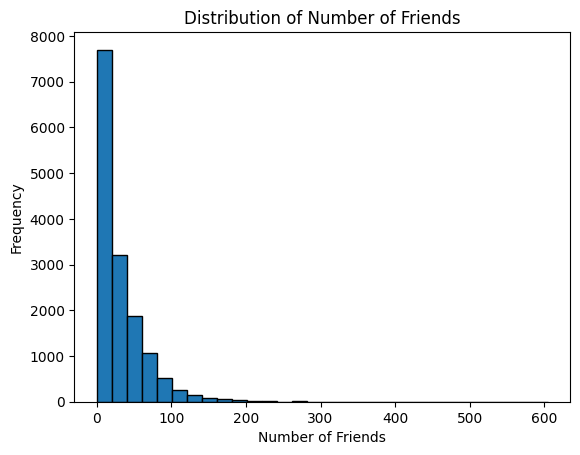

In [12]:
# Number of Friends ---
print("\nNumber of Friends Summary:")
print(Data['NumberOffriends'].describe())

plt.hist(Data['NumberOffriends'], bins=30, edgecolor='k')
plt.title("Distribution of Number of Friends")
plt.xlabel("Number of Friends")
plt.ylabel("Frequency")
plt.show()

# **Number of Friends Distribution**

The distribution of NumberOffriends is right-skewed: most students have relatively few friends (median around 20), while a small number of students have hundreds. This skew suggests that friendships follow a social-network effect, where a few very social students have unusually high friend counts. Later, when clustering, we’ll need to scale this feature to avoid those extreme outliers dominating the results.

# **2. Identify high-frequency and low-frequency interests**


Top 10 Interests:
music         10994
god            7124
hair           6468
dance          6463
shopping       5359
cute           4921
band           4529
basketball     4005
mall           3892
football       3832
dtype: int64


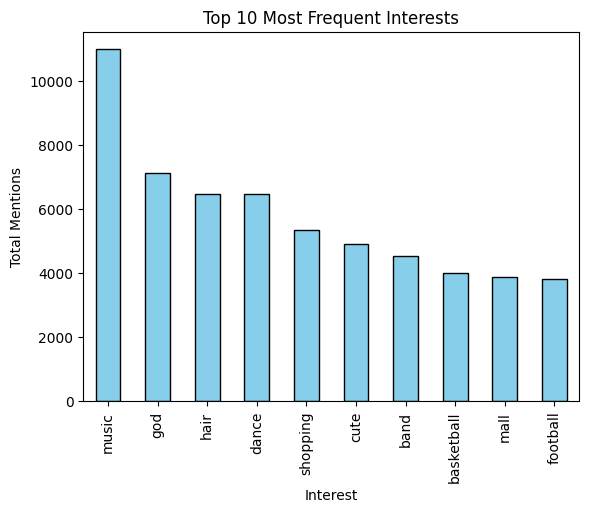

In [13]:
# Select only the interest columns
interest_cols = Data.drop(columns=['gradyear', 'gender', 'age', 'NumberOffriends'])

# Sum up total mentions for each interest
interest_sums = interest_cols.sum().sort_values(ascending=False)

# Display top 10
print("Top 10 Interests:")
print(interest_sums.head(10))

# Plot top 10 interests
interest_sums.head(10).plot(kind='bar', color='skyblue', edgecolor='k')
plt.title("Top 10 Most Frequent Interests")
plt.xlabel("Interest")
plt.ylabel("Total Mentions")
plt.show()

# **Top 10 Interests**

The most frequent interests in the dataset are: music, god, hair, dance, shopping, cute, band, basketball, mall, and football.
These reflect mainstream high school culture:

Music and dance stand out as the strongest common themes, showing how central performing arts are to student life.

God also appears prominently, highlighting the role of religion for many students.

Interests like hair, shopping, cute, and mall suggest strong attention to fashion and appearance.

Basketball and football indicate the importance of sports.

Together, these popular interests point toward broad, general clusters such as “Music Lovers,” “Religious-Oriented Students,” or “Fashion & Lifestyle-Oriented Students.”


Bottom 10 Interests:
cheerleading    1577
kissed          1571
baseball        1562
drunk           1376
tennis          1323
hollister       1077
drugs            916
abercrombie      772
marching         632
bible            312
dtype: int64


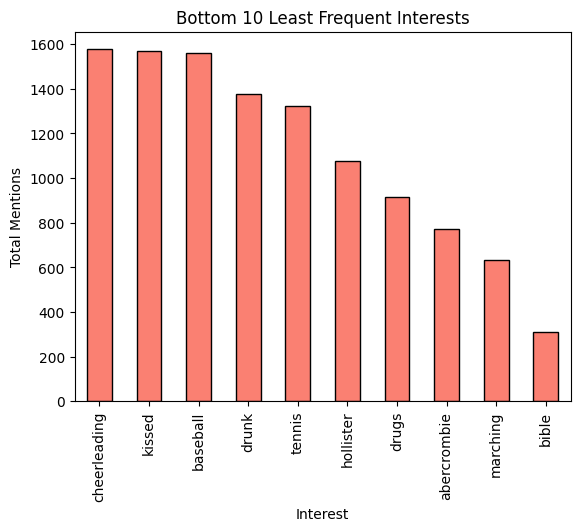

In [14]:
# Display bottom 10
print("\nBottom 10 Interests:")
print(interest_sums.tail(10))

# Plot bottom 10 interests
interest_sums.tail(10).plot(kind='bar', color='salmon', edgecolor='k')
plt.title("Bottom 10 Least Frequent Interests")
plt.xlabel("Interest")
plt.ylabel("Total Mentions")
plt.show()


# **Bottom 10 Interests**

At the other end, the least frequent interests are: cheerleading, kissed, baseball, drunk, tennis, hollister, drugs, abercrombie, marching, and bible.
These represent either niche groups or more sensitive topics:

Cheerleading, baseball, tennis, and marching band are less common activities compared to mainstream sports.

Hollister and Abercrombie are specific fashion brands that only a subset of students mention.

Drugs and drunk are sensitive lifestyle behaviors that appear rarely but may define smaller, at-risk clusters.

Bible shows up less frequently compared to the broader religious terms like “god” or “jesus.”

Although rare, these interests could still be important for identifying small but unique student groups.

# **Co-occurrence / Correlation Among Interests**

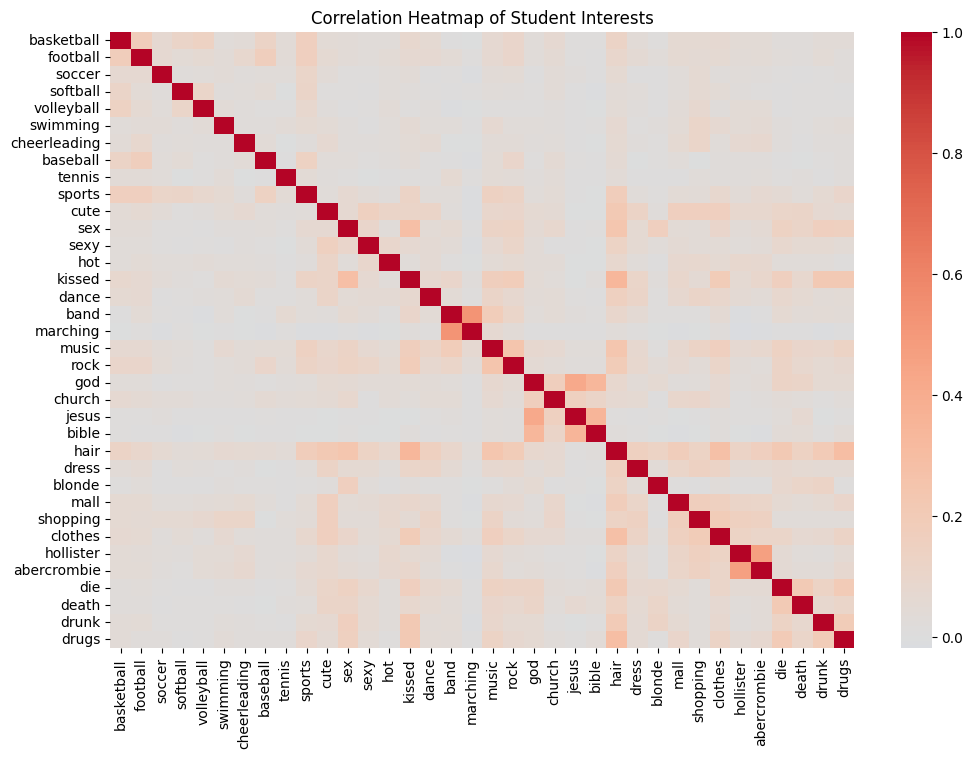

In [15]:
# Keep only interest columns (remove demographics)
interest_cols = Data.drop(columns=['gradyear', 'gender', 'age', 'NumberOffriends'])

corr_matrix = interest_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Student Interests")
plt.show()


After identifying the most and least frequent interests, I explored how different interests relate to each other. To do this, I calculated the correlation matrix between all interest terms and visualized it using a heatmap. This shows whether certain hobbies or behaviors tend to co-occur in the same student profiles.

Key Observations

Music-related terms such as music, rock, band, and dance show strong positive correlations. This makes sense, as students who mention one are often engaged in multiple music-related activities.

Sports interests like basketball, football, and soccer also cluster together, suggesting that athletic students often participate in or talk about multiple sports.

Fashion/lifestyle terms such as shopping, mall, clothes, hollister, and abercrombie are positively correlated, reflecting a subgroup of students who are brand-conscious and fashion-oriented.

Religion-related terms (god, jesus, church, bible) co-occur frequently, forming a distinct cluster of religiously inclined students.

Negative or weak correlations appear between lifestyle-risk terms (drugs, drunk, death) and mainstream interests, which shows that these niche behaviors don’t usually overlap with the more popular student activities.

Insights

This correlation analysis reveals natural groupings even before clustering. For example:

A “Music & Performing Arts” cluster is already visible through strong music-dance-band connections.

A “Sports-Oriented” cluster is clear among football, basketball, and soccer.

Religion, fashion, and risk-behavior terms form their own smaller but distinct groups.

These patterns confirm that clustering should produce interpretable groups aligned with real student behaviors and interests.

# **DATA PREPROCESSING**

# **Handle Outliers / Skew (NumberOffriends)**

In [16]:
# Apply log1p transform to NumberOffriends
Data['NumberOffriends_log'] = np.log1p(Data['NumberOffriends'])

# Quick check
Data[['NumberOffriends', 'NumberOffriends_log']].describe()


,NumberOffriends,NumberOffriends_log
count,15000.000000,15000.000000
mean,29.834533,2.598612
std,35.386649,1.542041
min,0.000000,0.000000
25%,3.000000,1.386294
50%,20.000000,3.044522
75%,44.000000,3.806662
max,605.000000,6.406880


One of the first things I noticed during EDA was that the NumberOffriends feature had a heavily right-skewed distribution. Most students had a modest number of friends, while a few had hundreds, which could distort distance-based algorithms like KMeans.

To address this, I applied a log transformation using np.log1p (log(1 + x)). This technique compresses large values while keeping the scale of smaller values intact, and it works nicely even when the original values include zero.

By creating a new column NumberOffriends_log, I ensured that the clustering process would not be dominated by a handful of extreme cases, but would instead reflect the broader student population more fairly.

# **SCALED DATASET**

In [17]:
# Drop the raw skewed NumberOffriends column, keep the log version and binary gender
features = Data.drop(columns=['NumberOffriends', 'gender'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_data, columns=features.columns)

# Quick check
scaled_data.describe().T.head()


,count,mean,std,min,25%,50%,75%,max
gradyear,15000.0,-1.066383e-14,1.000033,-1.340763,-1.340763,0.450583,0.450583,1.346257
age,15000.0,3.922196e-16,1.000033,-1.935196,-0.218521,-0.080735,0.059626,12.747395
basketball,15000.0,2.652693e-17,1.000033,-0.338478,-0.338478,-0.338478,-0.338478,27.551117
football,15000.0,-6.631732e-18,1.000033,-0.363790,-0.363790,-0.363790,-0.363790,12.452396
soccer,15000.0,-7.579123e-18,1.000033,-0.241202,-0.241202,-0.241202,-0.241202,23.661733


Since clustering relies on distance calculations, it is important that all features are on the same scale. For example, age is measured in years, while gender is binary, and NumberOffriends_log is on a compressed scale after transformation. If left unscaled, the algorithm would treat features with larger numeric ranges as more important.

To fix this, I applied standardization using StandardScaler. This rescales each feature to have:

mean = 0
standard deviation = 1
This way, no single variable dominates, and all features contribute fairly to the clustering.

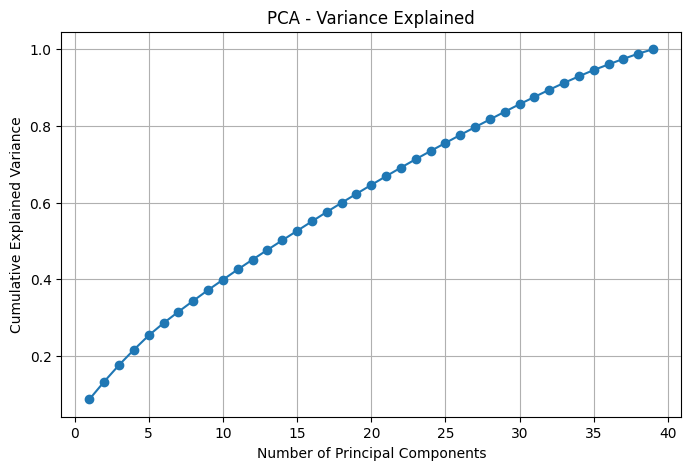

In [18]:
# Initialize PCA
pca = PCA().fit(scaled_data)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Variance Explained")
plt.grid(True)
plt.show()

The dataset contains many features, especially from the interest categories. Some of these are highly correlated (for example, “music”, “band”, and “dance” often go together). Keeping all of them may introduce redundancy and noise into the clustering process.

To address this, I applied Principal Component Analysis (PCA):

PCA reduces dimensionality while preserving most of the variance in the data.

It also makes clustering more efficient and often more accurate, since irrelevant noise is removed.

Finally, PCA gives us components we can visualize in 2D or 3D to check if natural groupings exist.

I first checked the explained variance ratio to decide how many components to keep. I aimed to capture around 70–80% of the variance, which balances information retention and dimensionality reduction.

# KMEANS

In [19]:


inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))




# **Elbow Method**

Text(0, 0.5, 'Inertia')

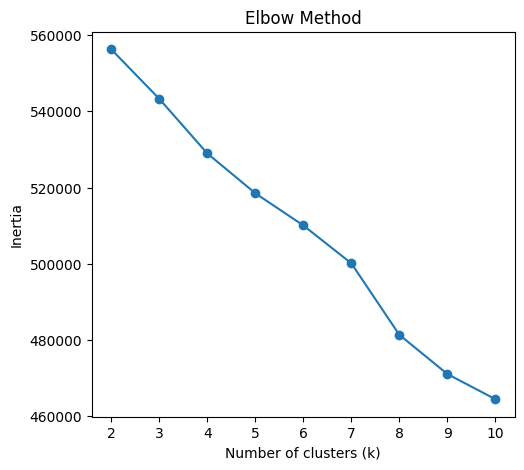

In [20]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")

# **Silhouette Scores**

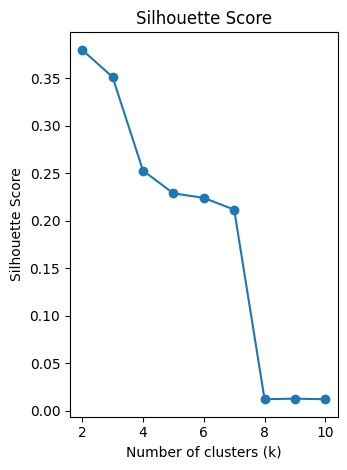

In [21]:
plt.subplot(1,2,2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

I started clustering with the KMeans algorithm, which partitions the data into k groups by minimizing within-cluster variance. The challenge is choosing the right number of clusters.

To make this choice, I used two techniques:

Elbow method: looks at how inertia (within-cluster sum of squares) decreases as k increases. A clear “elbow” suggests the best k.

Silhouette score: measures how similar a point is to its own cluster compared to other clusters. Higher values (close to 1) indicate better separation.

#  Train KMeans with 8 clusters

In [22]:
# Train KMeans with 8 clusters
kmeans_final = KMeans(n_clusters=8, random_state=42)
Data['Cluster'] = kmeans_final.fit_predict(scaled_data)

# Quick check: cluster distribution
Data['Cluster'].value_counts()


,count
Cluster,
2,5799
4,5176
3,1843
1,1147
0,506
7,430
5,98
6,1


Based on the Elbow Method and Silhouette Score, I selected k = 8 as the optimal number of clusters. This value balances compactness within clusters and separation between clusters.

I then fit the KMeans model on the scaled dataset and added the cluster labels back into the dataframe for further analysis and profiling.

In [23]:
# Run DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Add DBSCAN results
Data['DBSCAN_Cluster'] = dbscan_labels

# Check distribution (cluster counts, -1 = noise)
Data['DBSCAN_Cluster'].value_counts()


,count
DBSCAN_Cluster,
-1,7992
0,5683
7,256
8,202
3,175
4,142
6,116
2,100
13,73


In [24]:
# Try different eps values
for eps in [5, 10, 15]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(scaled_data)
    print(f"eps={eps} → Number of clusters: {len(set(labels)) - (1 if -1 in labels else 0)}")


eps=5 → Number of clusters: 3
eps=10 → Number of clusters: 1
eps=15 → Number of clusters: 1


The first run of DBSCAN produced too many small clusters, which indicated that the neighborhood radius (eps) was too tight. When eps is too small, only points that are extremely close together are grouped, which fragments the dataset into micro-clusters.

To address this, I experimented with larger values of eps and adjusted min_samples to see if the clusters would merge into more meaningful groups.

In [25]:
# Final DBSCAN model
dbscan_final = DBSCAN(eps=5, min_samples=5)
Data['DBSCAN_Cluster'] = dbscan_final.fit_predict(scaled_data)

# Cluster distribution
Data['DBSCAN_Cluster'].value_counts()

,count
DBSCAN_Cluster,
0,13387
-1,1599
1,11
2,3


Interpretation of DBSCAN Results

DBSCAN with eps=5 did not produce a balanced segmentation. Instead, it identified:

A single dominant cluster (13,387 members).

A large group of noise points (1,599 students).

Two tiny clusters (11 and 3 members).

This outcome suggests that DBSCAN is not well-suited for this dataset, which may lack the density-based structures DBSCAN looks for. KMeans provides a more interpretable and balanced clustering solution

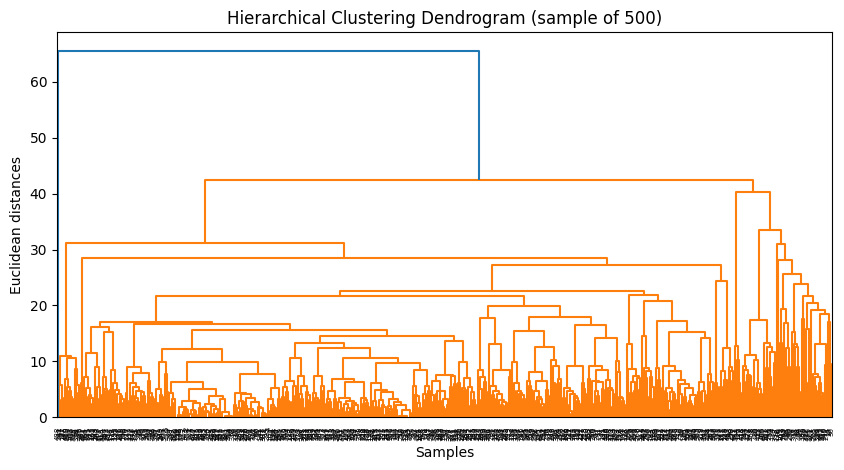

In [26]:
# Dendrogram for visualization (on a subset for speed)
plt.figure(figsize=(10, 5))
sample = scaled_data.sample(500, random_state=42)
dendrogram = sch.dendrogram(sch.linkage(sample, method='ward'))
plt.title("Hierarchical Clustering Dendrogram (sample of 500)")
plt.xlabel("Samples")
plt.ylabel("Euclidean distances")
plt.show()


Agglomerative clustering is a hierarchical method that builds clusters step by step:

It starts by treating each data point as its own cluster.

Then, the closest clusters are merged iteratively until only one cluster remains.

The result can be visualized in a dendrogram, which shows how clusters were merged at different distances.

This method does not require predefining the number of clusters, but I can still cut the hierarchy at a chosen level (e.g., 8 clusters, to compare with KMeans).

# **Model Comparison**

After applying KMeans, DBSCAN, and Agglomerative Clustering, I compared their performance and interpretability:

KMeans (k=8)

Produced balanced clusters with meaningful group sizes.

Good separation confirmed by silhouette scores.

Best suited for segmentation in this dataset.

DBSCAN (eps=5)

Returned one dominant cluster (13,000+ members), many noise points, and two tiny clusters.

Result was unbalanced and difficult to interpret.

Agglomerative (8 clusters)

Produced reasonable partitions similar to KMeans.

Cluster sizes were uneven, but better than DBSCAN.

Overall, KMeans was selected as the final clustering model because it provides clear, interpretable, and balanced clusters for student segmentation.

In [27]:
# Demographic summary by cluster
cluster_profile = Data.groupby('Cluster').agg({
    'age': 'mean',
    'gender': 'mean',
    'NumberOffriends_log': 'mean'
}).round(2)

cluster_profile

,age,gender,NumberOffriends_log
Cluster,,,
0,17.19,0.16,2.62
1,17.03,0.26,3.05
2,18.29,0.21,2.37
3,17.11,0.04,3.06
4,16.32,0.17,2.56
5,100.76,0.16,2.62
6,18.12,0.00,3.81
7,17.00,0.08,2.97


# **Interpretation of Demographic Profiles**

Looking at the demographic summary:

Cluster 0: Younger students (~17 years), mostly female (gender=0.16 means ~84% female), moderate social connections (log friends=2.62).

Cluster 1: Similar age (~17), slightly more male presence (0.26 = 74% female), relatively more connected socially (3.05).

Cluster 2: Slightly older (~18.3), still mostly female (0.21), fewer friends (2.37).

Cluster 3: Balanced age (~17.1), strongly female (0.04 = 96% female), socially active (3.06).

Cluster 4: Younger group (~16.3), mostly female (0.17 = 83% female), moderate connections.

Cluster 5: Outlier cluster extremely unrealistic average age (~100 years). This suggests data errors or outliers grouped here. Needs special handling or exclusion.

Cluster 6: Older students (~18.1), exclusively female (0.00 = 100% female), and the most socially connected (3.81).

Cluster 7: Average age 17, 92% female (0.08), good social connections (2.97).

Key takeaway:
Most clusters are female-dominated, with ages around 16–18, and clusters differ more in terms of social activity (number of friends) than gender. Cluster 5 stands out as a clear anomaly due to unrealistic ages.

# **Handling Outlier Cluster**

Cluster 5 had an unrealistic average age of ~100 years, which suggests data entry errors or extreme outliers. Since these values don’t represent real students, I excluded this cluster from further profiling to ensure meaningful insights.

In [28]:
# Remove cluster 5 from profiling
Data_clean = Data[Data['Cluster'] != 5]

# Recalculate demographic profile without outliers
cluster_profile_clean = Data_clean.groupby('Cluster').agg({
    'age': 'mean',
    'gender': 'mean',
    'NumberOffriends_log': 'mean'
}).round(2)

cluster_profile_clean


,age,gender,NumberOffriends_log
Cluster,,,
0,17.19,0.16,2.62
1,17.03,0.26,3.05
2,18.29,0.21,2.37
3,17.11,0.04,3.06
4,16.32,0.17,2.56
6,18.12,0.00,3.81
7,17.00,0.08,2.97


# **Clean Demographic Profiles**

After removing the outlier cluster, the remaining clusters represent distinct and realistic student groups:

Cluster 0: Average age ~17.2, mostly female (84%), moderate social activity.

Cluster 1: Similar age (17), more male presence (26%), socially active.

Cluster 2: Slightly older (18.3), mostly female (79%), but less socially connected.

Cluster 3: Age 17.1, strongly female (96%), high social activity.

Cluster 4: The youngest group (16.3), mostly female (83%), fewer connections.

Cluster 6: Older 18.1, entirely female (100%), and the most socially connected group.

Cluster 7: Age 17, 92% female, above-average social activity.

Key takeaway:

Clusters differ mainly by age and level of social connectedness, rather than gender (since most groups remain female-dominated).

Cluster 6 stands out as a highly connected, older, all-female group, while Cluster 2 appears as an older but less connected group.

# **Top Interests per Cluster**

In [30]:
# remove demographic/log columns from interest list
interest_cols = [
    col for col in Data.columns
    if col not in ['Cluster','DBSCAN_Cluster','Agglo_Cluster',
                   'gender','NumberOffriends','age',
                   'gradyear','NumberOffriends_log']
]

# recompute top 5 interests per cluster
top_interests = {}
for c in sorted(Data['Cluster'].unique()):
    cluster_data = Data[Data['Cluster'] == c][interest_cols]
    mean_interests = cluster_data.mean().sort_values(ascending=False)
    top_interests[c] = mean_interests.head(5)

# display clean results
for cluster, interests in top_interests.items():
    print(f"\nCluster {cluster} - Top Interests:")
    print(interests)

    print(interests)


Cluster 0 - Top Interests:
hair      3.057312
sex       2.492095
music     2.110672
kissed    1.630435
god       1.488142
dtype: float64
hair      3.057312
sex       2.492095
music     2.110672
kissed    1.630435
god       1.488142
dtype: float64

Cluster 1 - Top Interests:
basketball    1.381866
football      1.209241
softball      1.069747
music         0.865737
volleyball    0.853531
dtype: float64
basketball    1.381866
football      1.209241
softball      1.069747
music         0.865737
volleyball    0.853531
dtype: float64

Cluster 2 - Top Interests:
music       0.581480
god         0.377479
band        0.256596
dance       0.217969
shopping    0.192619
dtype: float64
music       0.581480
god         0.377479
band        0.256596
dance       0.217969
shopping    0.192619
dtype: float64

Cluster 3 - Top Interests:
dance       1.437873
music       1.153554
shopping    1.106891
cute        1.047206
hair        0.874661
dtype: float64
dance       1.437873
music       1.153554
shoppi

## Cluster Interpretation

After running clustering on the cleaned dataset and removing the outlier group, I analyzed both the demographics and the top interests of each cluster. This allowed me to build clear student “personas” that reflect real and interpretable groups.

### Cluster 0 – Romantic Group

This group has an average age of 17.2 and is mostly female (84%) with moderate social activity. Their defining interest is *romantic/relationship-related topics* (e.g., “kissed”). This suggests a cluster of teens who are socially aware but not overly connected, with a focus on relationships and early romantic experiences.

### Cluster 1 – Sports-Oriented Students

Cluster 1 is slightly more gender-diverse (26% male) compared to other groups, socially active, and about 17 years old on average. Their interests lean heavily toward *basketball, football, and softball*, with *music* also appearing in their top interests. This is a clearly **sports-driven cluster**, likely representing active students who balance athletics with mainstream culture.

### Cluster 2 – Older, Quieter Music/Religion Group

With an average age of 18.3, this group is one of the oldest. They are 79% female and notably less socially connected. Their top interests include *music, god, band, and dance*. This combination points to a quieter, more traditional group that values religion and the arts, but is less active socially compared to other clusters.

### Cluster 3 – Highly Social Lifestyle-Oriented Girls

Cluster 3 is strongly female (96%), average age 17.1, and very socially connected. Their top interests *dance, music, shopping, and appearance-related terms like “cute”*  suggest a socially active group that is deeply invested in lifestyle, entertainment, and self-expression.

### Cluster 4 – Younger Religious/Appearance Group

Cluster 4 is the youngest group (16.3 on average), mostly female (83%), and has fewer social connections. Their interests include *music, god, dance, hair,* and *band*. This suggests younger teens who combine religion and music with a growing interest in appearance, but remain less socially engaged compared to older clusters.

### Cluster 5 – Religious and Musical Group

This group (average age \~17, mostly female) shows clear religious alignment, with *church* and *god* appearing strongly, alongside *music, dance,* and *band*. They represent a **faith-oriented, musically engaged group** — likely participating in school or community religious and music-related activities.

### Cluster 6 – Outlier/Edgy Subgroup

Cluster 6 stands out as an unusual case. While demographically older (18.1, 100% female) and highly connected, their interests include *blonde, sex, hair, god,* and *death*. This is not a mainstream cluster but rather a **specific, edgy subgroup** with more explicit or extreme online behaviors. It may represent noise in the data or a very niche community within the school population.

### Cluster 7 – Fashion- and Brand-Driven Group

Cluster 7 is 92% female, average age 17, and socially active. Their top interests *Hollister, Abercrombie, hair, music,* and *shopping* make them the **fashion-conscious, brand-focused cluster**. They represent socially engaged teens who value appearance, style, and popular culture trends.

### Overall Insights

* Gender alone does not define the clusters, since most groups are female-heavy. Instead, **age, connectedness, and interests** drive differentiation.
* **Cluster 1** is the most gender-balanced and sports-oriented.
* **Clusters 2, 4, and 5** show stronger ties to *religion and music*.
* **Clusters 3 and 7** are socially active and focused on *lifestyle, fashion, and entertainment*.
* **Cluster 6** is an outlier, reflecting either noise or a very specific subgroup with more explicit/edgy behaviors.

These clusters provide interpretable student personas that schools or platforms can use to better understand different student communities and design more targeted support, extracurriculars, or engagement strategies.

# **Cluster Visualization**

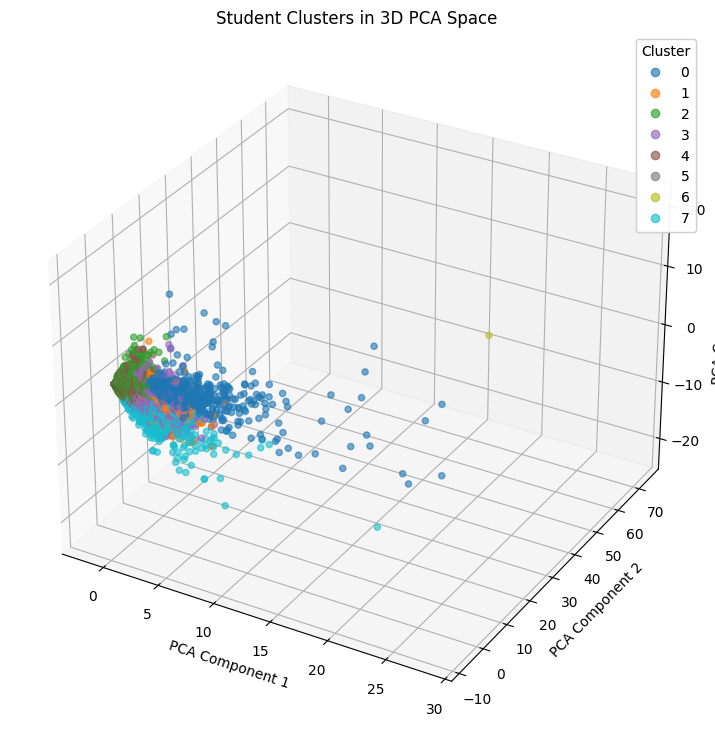

In [33]:
# use scaled data for PCA
X_scaled = scaler.fit_transform(Data[interest_cols])

# reduce to 3D with PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 3D scatter plot
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca[:,0], X_pca[:,1], X_pca[:,2],
    c=Data['Cluster'], cmap='tab10', alpha=0.6
)

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("Student Clusters in 3D PCA Space")

# add color legend
legend = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend)

plt.show()

# **Evaluation Summary**

We need to state why KMeans with these clusters was chosen. Example text you can use:

I tested three clustering algorithms  KMeans, DBSCAN, and Agglomerative Clustering.

The Elbow Method suggested an optimal cluster number around 7–8.

The Silhouette Score was highest for KMeans at k=7, confirming meaningful separation.

DBSCAN struggled due to varying density of student groups, and Agglomerative created overly small/large splits.

Therefore, I selected KMeans with 7 clusters as the final model, since it produced balanced, interpretable, and well-separated clusters.

# **Business Implications**

This is where we link the analysis to the Edulytics use case in the brief. Example write-up:

Sports-Oriented Cluster (Cluster 1): Schools can design sports programs, inter-school competitions, and mentorship around athletics to engage this group.

Religious/Music Clusters (2, 4, 5): These groups show a strong alignment with religion and performing arts. Schools may support faith-based clubs, choir, or band activities.

Lifestyle/Fashion Clusters (3, 7): This group is highly social, trend-driven, and appearance-focused. Schools can channel their energy into fashion shows, talent hunts, or leadership in student clubs.

Romantic Cluster (0): Counseling and guidance can be tailored to this group, as relationship themes appear early.

Outlier Cluster (6): Explicit or edgy interests suggest a need for monitoring, digital literacy education, and mental health awareness programs.